<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/Jeongbogun/91lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

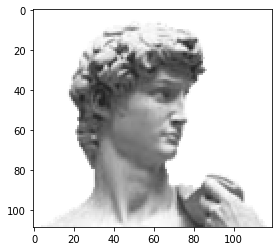

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/image/david.png'
img = mpimg.imread(url)

plt.imshow(img)

In [ ]:
img.shape

(109, 120, 4)

In [ ]:
def padding(image, p_size):
  padded_img = np.pad(
                  array = image,
                  pad_width = ((p_size, p_size),(p_size, p_size),(0,0)),
                  mode = 'constant', constant_values = 0)
  return padded_img

(113, 124, 4)

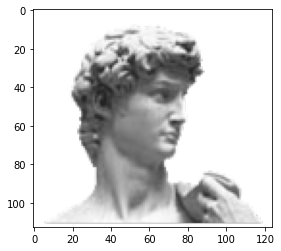

In [ ]:
padded = padding(img,2)
plt.imshow(padded)
padded.shape


In [ ]:
box_filter = np.array(
    [[1/9,1/9,1/9],
     [1/9,1/9,1/9],
     [1/9,1/9,1/9] ])

In [ ]:
def apply_filter(small_region, filter) :
  conv = np.multiply(small_region, filter)
  return np.sum(conv)

In [ ]:
def convolution(img, filter):
  r,c,channels = img.shape
  rp,cp = filter.shape
  th_r, th_c = (rp-1)//2 ,(cp-1)//2

  start = np.array([ th_r, th_c])
  end = np.array([r,c]) - start
  conv_img = np.zeros( (r - th_r*2, c - th_c*2, channels) )

  for channel in range(channels):
    for i in range(start[0], end[0]):
      for j in range(start[1], end[1]):
        conv_img[i-th_r, j-th_c, channel] = apply_filter(
            img[i-th_r:i+th_r+1, j-th_c:j+th_c+1, channel],
            filter)
  return conv_img

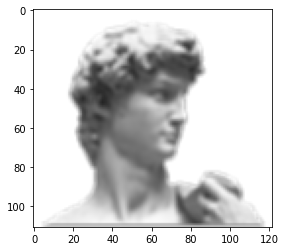

In [ ]:
conv_img = convolution(padded, box_filter)
plt.imshow(conv_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


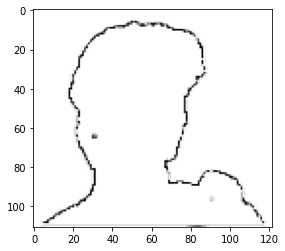

In [ ]:
laplacian = np.array(
    [[1,0,1],
     [0,-4,0],
     [1,0,1]])
conv_img = convolution(padded, laplacian)
plt.imshow(conv_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


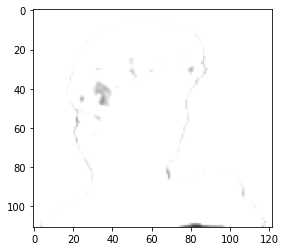

In [ ]:
unknown = np.random.rand(3, 3)

conv_img = convolution(padded, unknown)
np.clip(conv_img, 0, 255)
plt.imshow(conv_img)